## Spam filter

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [2]:
import nltk # Required for preprocessing tasks

The data has been provided by [UCI collections](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi-x-_bge_pAhWaXSsKHfRMACkQFjACegQIAxAB&url=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FSMS%2BSpam%2BCollection&usg=AOvVaw3scsW50LOCjz32-tGbXe00)

In [3]:
message = pd.read_csv('smsspamcollection/SMSSpamCollection',sep= '\t',names=['label','message'])
# Location of files on my local directory

In [4]:
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
message['length']=message['message'].apply(len)

In [6]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


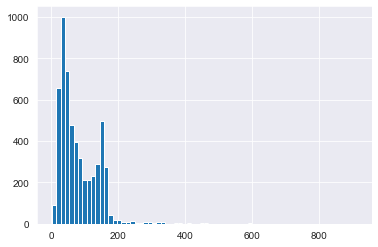

In [7]:
message['length'].hist(bins = 70)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000255AFFF48C8>,
      dtype=object)

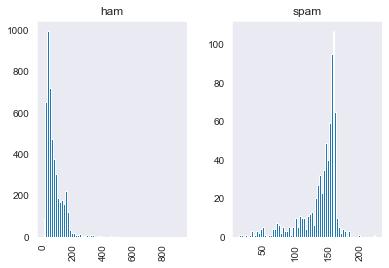

In [8]:
message.hist(by = 'label',bins = 70,column='length')
# Seems to be a relation between length of spam and ham messages

In [9]:
def text_process(message): #This function will be used as an analyzer in CountVectorzer method
    message = ''.join([i for i in message.rstrip() if i not in string.punctuation])
    return [i for i in message.split() if i not in nltk.corpus.stopwords.words('english')]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
bow_transformer = CountVectorizer(analyzer=text_process) # To implement BagOfWords method

In [12]:
bow_transformer.fit(message['message'])

CountVectorizer(analyzer=<function text_process at 0x00000255AFFD23A8>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
messages_bow = bow_transformer.transform(message['message'])

___

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [16]:
tdifd_messages = tfidf_transformer.transform(messages_bow)

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
spam_detect_model = MultinomialNB().fit(tdifd_messages,message['label'])

In [19]:
# spam_detect_model.predict(....)

### We must rather use the train test split than to test upon the training data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
msg_train, msg_test, label_train, label_test = train_test_split(message['message'], message['label'], test_size=0.33, random_state=42)

**All that was done above could be done using** ***pipeline*** **feature to control the workflow as shown below**

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
#This pipeline contains steps needed to be performed

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)), #Step 1
    ('tfidf',TfidfTransformer()), #Step2
    ('classifier',MultinomialNB()) #Step3
])

In [24]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000255AFFD23A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
predicions = pipeline.predict(msg_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predicions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1659
        spam       0.73      1.00      0.85       180

    accuracy                           0.96      1839
   macro avg       0.87      0.98      0.91      1839
weighted avg       0.97      0.96      0.97      1839



In [27]:
print(confusion_matrix(label_test,predicions))

[[1593    0]
 [  66  180]]
